In [1]:
import tensorflow as tf 
print(tf.__version__)
from tensorflow.keras.layers import Activation, Dense, Dropout, LeakyReLU
import matplotlib.pyplot as plt
import numpy as np

2.9.1


In [2]:
# Load MNIST dataset 
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # divide by pixels I think (RGB) 

In [3]:
# one-hot encode 
'''y_train = tf.one_hot(y_train, 10, axis=1).numpy()
y_test = tf.one_hot(y_test, 10, axis=1).numpy()'''
y_train.shape

(60000,)

In [42]:
# Model 2 hidden dense layers (500, 300)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    Dense(500, dtype=tf.float32),
    Activation("relu", dtype=tf.float32),
    Dropout(0.2, dtype=tf.float32),
    Dense(300, dtype=tf.float32),
    Activation("relu", dtype=tf.float32),
    Dropout(0.2, dtype=tf.float32),
    Dense(10, dtype=tf.float32)
])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 500)               392500    
                                                                 
 activation_16 (Activation)  (None, 500)               0         
                                                                 
 dropout_16 (Dropout)        (None, 500)               0         
                                                                 
 dense_25 (Dense)            (None, 300)               150300    
                                                                 
 activation_17 (Activation)  (None, 300)               0         
                                                                 
 dropout_17 (Dropout)        (None, 300)              

In [43]:
# Loss function 
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
pred = model(x_train).numpy()
loss = tf.reduce_mean(input_tensor=loss_fn(y_train, pred))
loss

<tf.Tensor: shape=(), dtype=float32, numpy=2.3340933>

In [44]:
# compile model 
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 56ms/step
Init prediction 5 actual answer 7


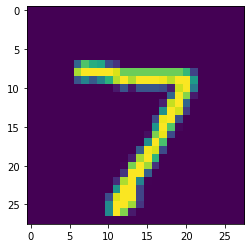

In [45]:
# visualize initial measurements
pred = model.predict(x_test[:1])
plt.imshow(x_test[0])
print(f"Init prediction {pred.argmax()} actual answer {y_test[0]}")
plt.show()

In [46]:
!ls model_mnist_digit/checkpoint

model_mnist_digit/checkpoint


In [47]:
# Load in pretrained weights 
model.load_weights('./model_mnist_digit/model.ckpt-0')

AssertionError: Some objects had attributes which were not restored: ["\n    <tf.Variable 'dense_24/kernel:0' shape=(784, 500) dtype=float32, numpy=\narray([[-0.05408223,  0.00565878,  0.05710893, ..., -0.04255653,\n        -0.00191049, -0.03926647],\n       [-0.03277498,  0.05031259, -0.014954  , ...,  0.06329914,\n        -0.06251783, -0.05154446],\n       [-0.05247967,  0.00859793,  0.02107422, ...,  0.02767473,\n        -0.03132694, -0.0517427 ],\n       ...,\n       [ 0.05405878, -0.01248445, -0.01747004, ...,  0.04270354,\n        -0.0414254 ,  0.06784929],\n       [-0.04419915,  0.03246234, -0.05514387, ...,  0.02570462,\n        -0.06530564,  0.03678765],\n       [ 0.05172185, -0.04083866, -0.06669894, ...,  0.04834835,\n        -0.02513957, -0.02936949]], dtype=float32)>: ['dense_24/kernel']", "\n    <tf.Variable 'dense_24/bias:0' shape=(500,) dtype=float32, numpy=\narray([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0.], dtype=float32)>: ['dense_24/bias']", "\n    <tf.Variable 'dense_25/kernel:0' shape=(500, 300) dtype=float32, numpy=\narray([[-0.00676799, -0.05424258,  0.01573966, ...,  0.06009966,\n        -0.06536496,  0.08060856],\n       [-0.03875319, -0.02185672, -0.04282028, ..., -0.07184774,\n         0.04986136, -0.00105299],\n       [ 0.03173718, -0.00948708,  0.04899311, ...,  0.0199402 ,\n         0.03164688,  0.02201882],\n       ...,\n       [ 0.01015873, -0.02275848,  0.01095422, ..., -0.03250257,\n        -0.07648154, -0.06471445],\n       [ 0.060285  , -0.05810099,  0.03107848, ...,  0.05322747,\n        -0.03947652,  0.01939364],\n       [-0.06794598,  0.06028859, -0.03510457, ...,  0.0751202 ,\n        -0.01389583,  0.00921069]], dtype=float32)>: ['dense_25/kernel']", "\n    <tf.Variable 'dense_25/bias:0' shape=(300,) dtype=float32, numpy=\narray([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>: ['dense_25/bias']", "\n    <tf.Variable 'dense_26/kernel:0' shape=(300, 10) dtype=float32, numpy=\narray([[ 0.13887824,  0.07317011, -0.08523991, ..., -0.12871483,\n        -0.11533919,  0.12935738],\n       [-0.07091473,  0.0134726 ,  0.03419787, ...,  0.03819203,\n         0.13064356, -0.05370609],\n       [-0.05031192, -0.08859384,  0.00578912, ..., -0.03366245,\n         0.02655128,  0.05316567],\n       ...,\n       [ 0.0982019 ,  0.03314014, -0.04238787, ..., -0.11969596,\n        -0.13042171, -0.06037867],\n       [ 0.07922457,  0.06785093,  0.03991915, ...,  0.10485835,\n        -0.09051043, -0.08889662],\n       [ 0.13702331, -0.13425416,  0.00089291, ..., -0.11327653,\n        -0.1211426 , -0.1262553 ]], dtype=float32)>: ['dense_26/kernel']", "\n    <tf.Variable 'dense_26/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>: ['dense_26/bias']"]

In [53]:
# training 
epochs = 10
model.fit(x_train, y_train, epochs=epochs)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0691 - accuracy: 0.9785
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0627 - accuracy: 0.9811
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0547 - accuracy: 0.9823
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0497 - accuracy: 0.9843
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0422 - accuracy: 0.9867
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0398 - accuracy: 0.9875
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0402 - accuracy: 0.9873
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0344 - accuracy: 0.9895
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0317 - accuracy: 0.9902
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.032

In [55]:
# Evaluate 
model.evaluate(x_test, y_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 1s 2ms/step - loss: 0.0935 - accuracy: 0.9797


[0.09352274984121323, 0.9797000288963318]

1/1 [==============================] - 0s 20ms/step
Final prediction 7 actual answer 7


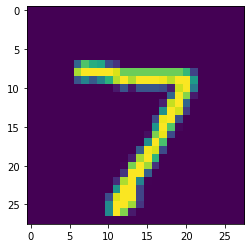

1/1 [==============================] - 0s 19ms/step
Final prediction 2 actual answer 2


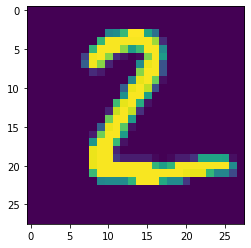

1/1 [==============================] - 0s 15ms/step
Final prediction 1 actual answer 1


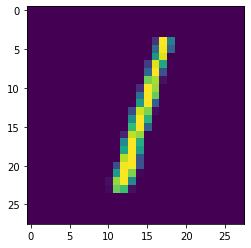

1/1 [==============================] - 0s 16ms/step
Final prediction 0 actual answer 0


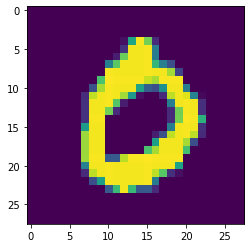

1/1 [==============================] - 0s 18ms/step
Final prediction 4 actual answer 4


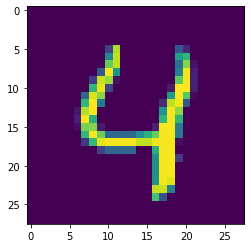

1/1 [==============================] - 0s 16ms/step
Final prediction 1 actual answer 1


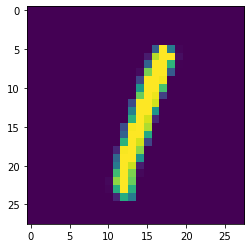

1/1 [==============================] - 0s 17ms/step
Final prediction 4 actual answer 4


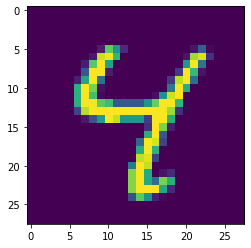

1/1 [==============================] - 0s 16ms/step
Final prediction 9 actual answer 9


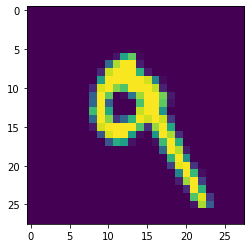

1/1 [==============================] - 0s 16ms/step
Final prediction 5 actual answer 5


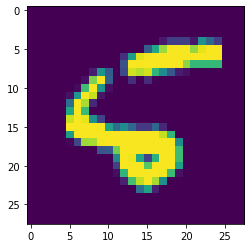

1/1 [==============================] - 0s 15ms/step
Final prediction 9 actual answer 9


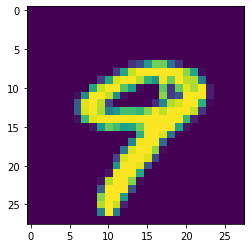

In [56]:
# visualize final measurements
for i in range(10):
    pred = model.predict(x_test[i:i+1])
    plt.imshow(x_test[i])
    print(f"Final prediction {pred.argmax()} actual answer {y_test[i]}")
    plt.show()

In [58]:
model.save("mnist_model_save/")

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set